In [2]:
import numpy as np
from scipy.stats import linregress
import csv 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

IV plot saved as '2Wire_Characterization_1ohm.png'


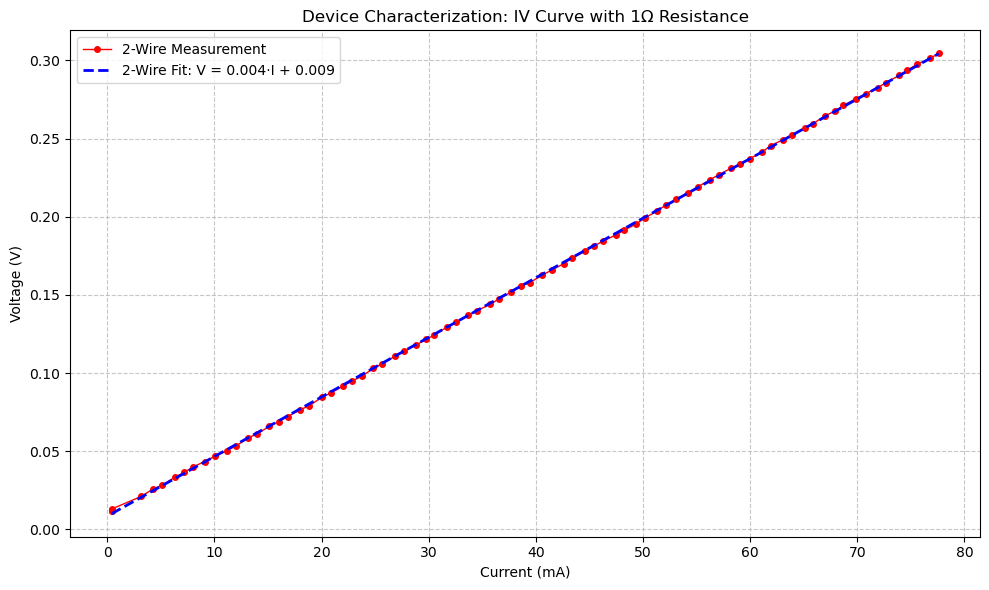

IV plot saved as '2Wire_Characterization_0.1ohm.png'


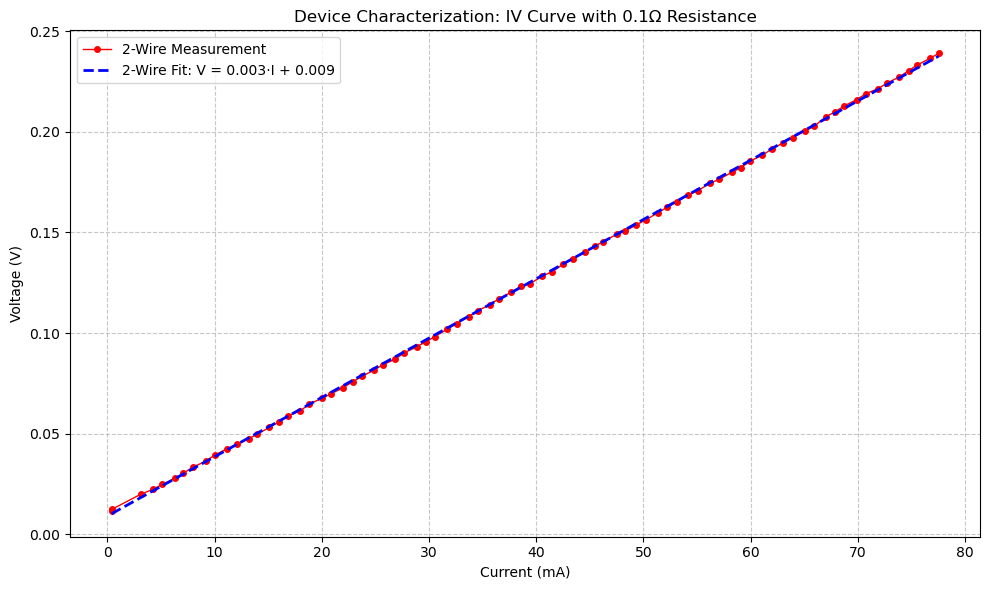

IV plot saved as '2Wire_Characterization_0.01ohm.png'


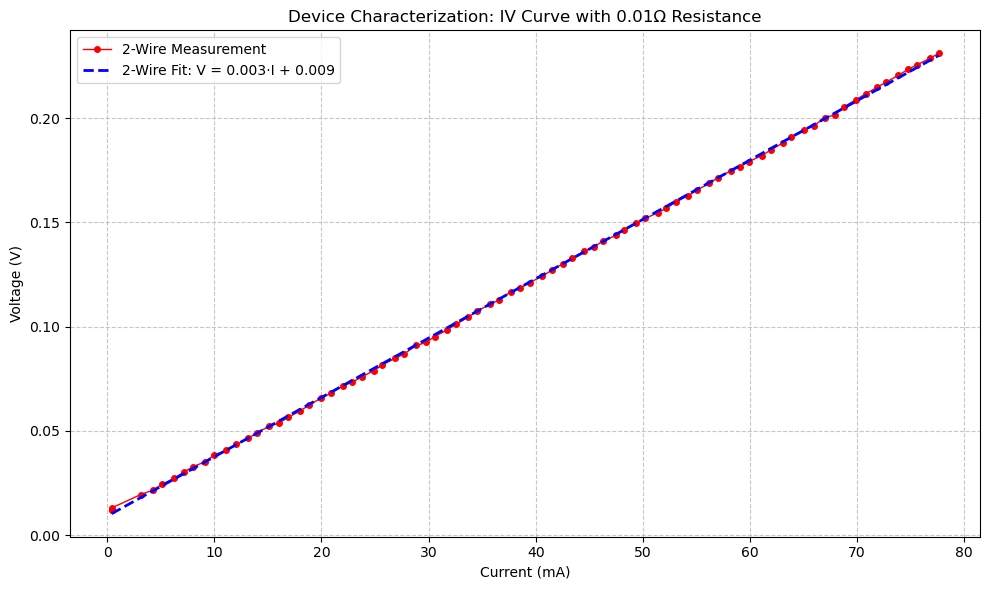

In [3]:


R_values = [1, 0.1, 0.01]

for R in R_values:
    # Use f-string for file path
    df = pd.read_csv(f'2Wire_Characterization_Data{R}.csv')
    
    # Calculate fits for both methods
    Fit_2wire, Off_2wire = np.polyfit(df["Current_mA"], df["V_2wire"], 1)
    
    
    plt.figure(figsize=(10, 6))
    
    # Plot 2-wire data and fit
    plt.plot(df["Current_mA"], df["V_2wire"], 'ro-', label='2-Wire Measurement', markersize=4, linewidth=1)
    x_fit = np.linspace(df["Current_mA"].min(), df["Current_mA"].max(), 200)
    plt.plot(x_fit, Fit_2wire * x_fit + Off_2wire, 'b--', linewidth=2, 
             label=f'2-Wire Fit: V = {Fit_2wire:.3f}·I + {Off_2wire:.3f}')
    
    
    plt.xlabel('Current (mA)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Device Characterization: IV Curve with {R}Ω Resistance')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    iv_plot_filename = f"2Wire_Characterization_{R}ohm.png"
    plt.savefig(iv_plot_filename, dpi=300)
    print(f"IV plot saved as '{iv_plot_filename}'")
    plt.show()

IV plot saved as '4Wire_Characterization_1ohm.png'


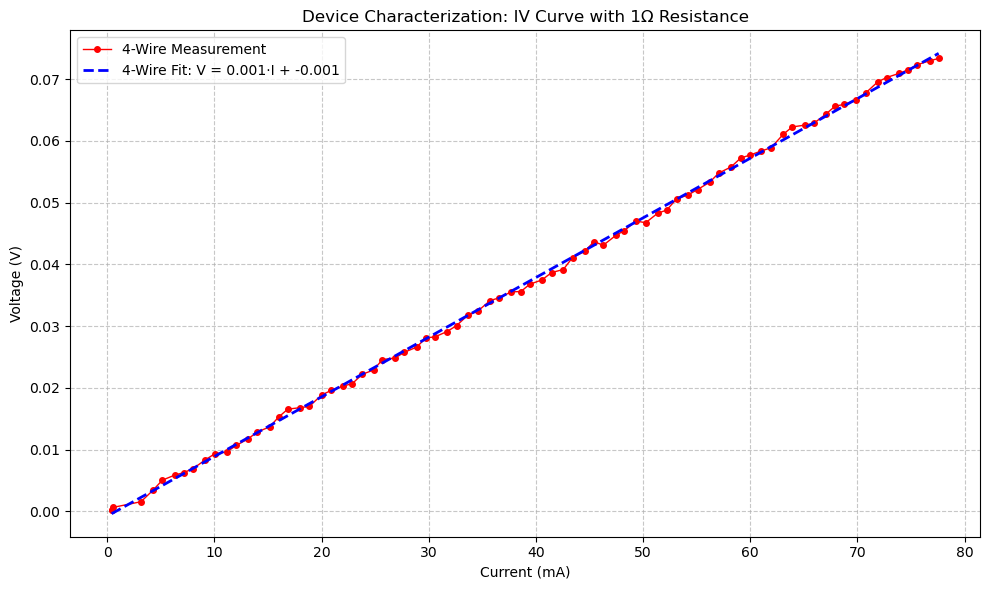

IV plot saved as '4Wire_Characterization_0.1ohm.png'


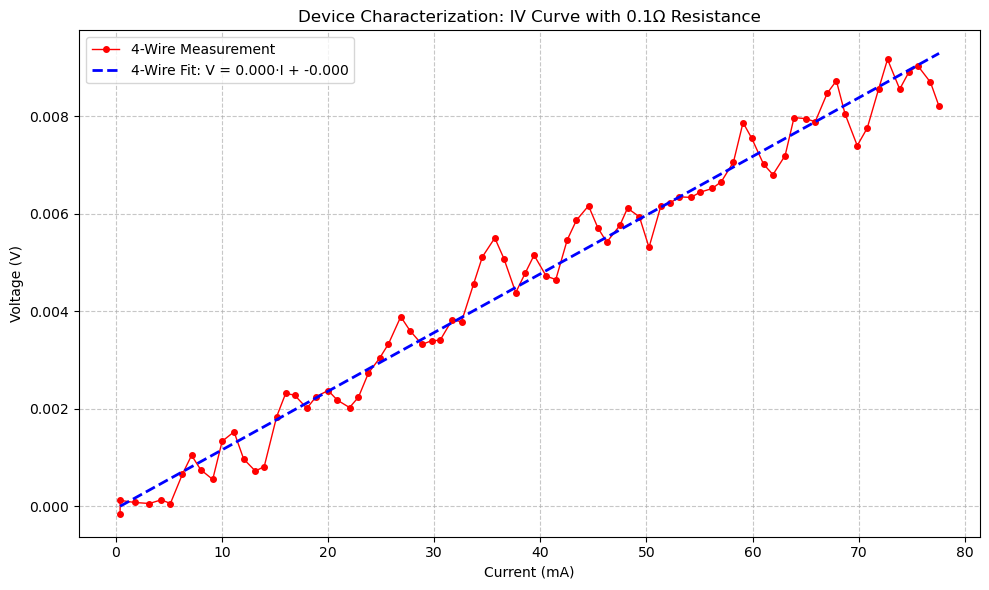

IV plot saved as '4Wire_Characterization_0.01ohm.png'


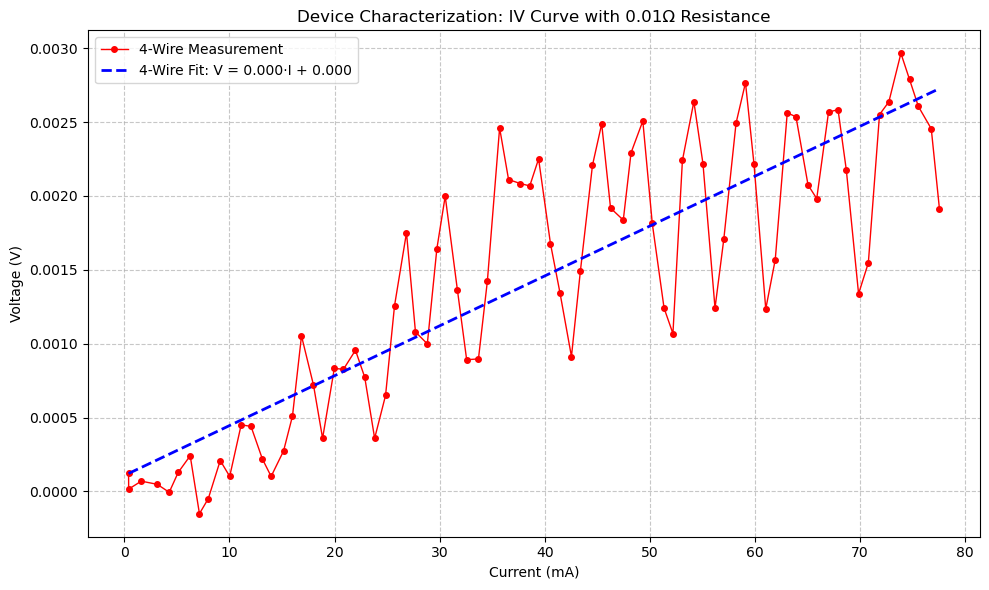

In [5]:
R_values = [1, 0.1, 0.01]

for R in R_values:
    # Use f-string for file path
    df = pd.read_csv(f'4Wire_Characterization_Data{R}.csv')
    
    # Calculate fits for both methods
    Fit_4wire, Off_4wire = np.polyfit(df["Current_mA"], df["V_4wire"], 1)
    
    
    plt.figure(figsize=(10, 6))
    
    # Plot 4-wire data and fit
    plt.plot(df["Current_mA"], df["V_4wire"], 'ro-', label='4-Wire Measurement', markersize=4, linewidth=1)
    x_fit = np.linspace(df["Current_mA"].min(), df["Current_mA"].max(), 200)
    plt.plot(x_fit, Fit_4wire * x_fit + Off_4wire, 'b--', linewidth=2, 
             label=f'4-Wire Fit: V = {Fit_4wire:.3f}·I + {Off_4wire:.3f}')
    
    
    plt.xlabel('Current (mA)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Device Characterization: IV Curve with {R}Ω Resistance')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    iv_plot_filename = f"4Wire_Characterization_{R}ohm.png"
    plt.savefig(iv_plot_filename, dpi=300)
    print(f"IV plot saved as '{iv_plot_filename}'")
    plt.show()

IV characterization plot saved as 'Device_IV_Characterization1.png'


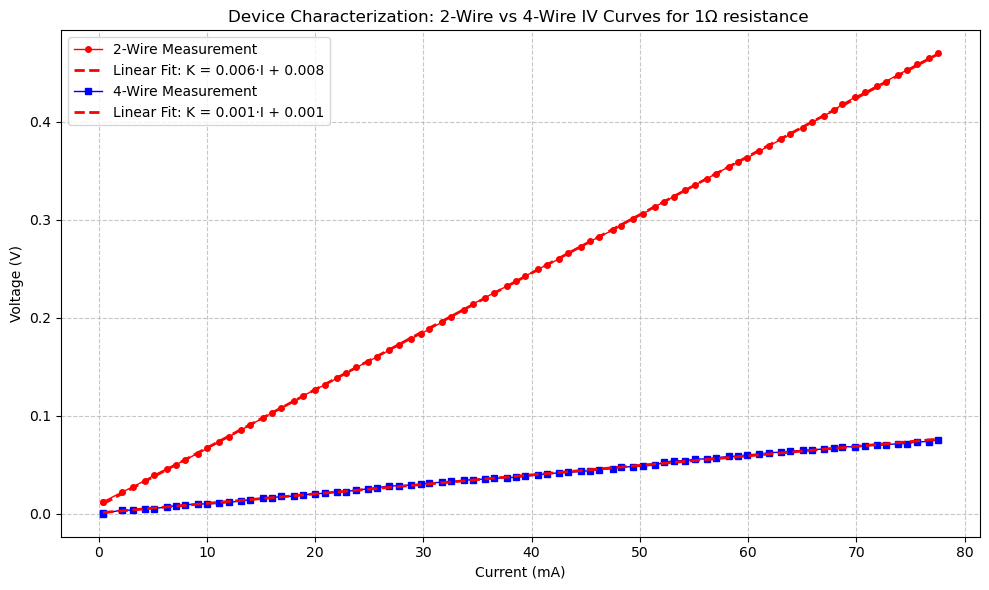

Resistance characterization plot saved as 'Device_Resistance_Characterization1.png'


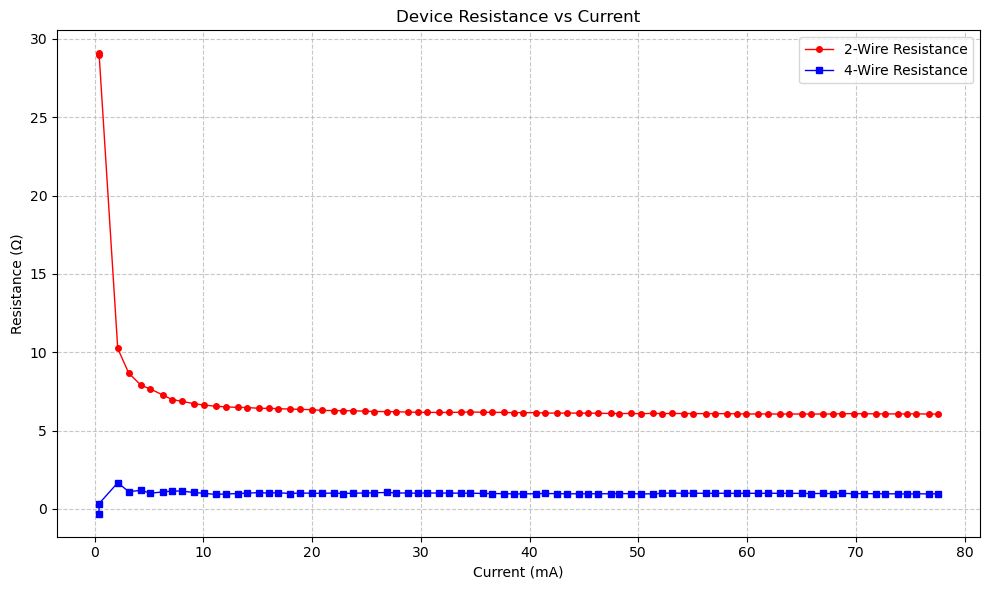

IV characterization plot saved as 'Device_IV_Characterization0.1.png'


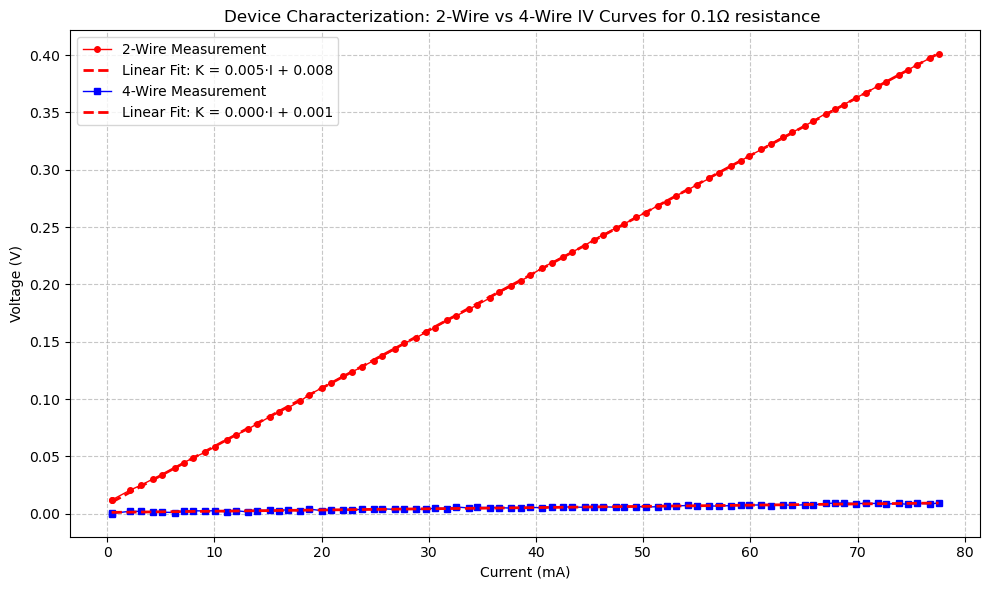

Resistance characterization plot saved as 'Device_Resistance_Characterization0.1.png'


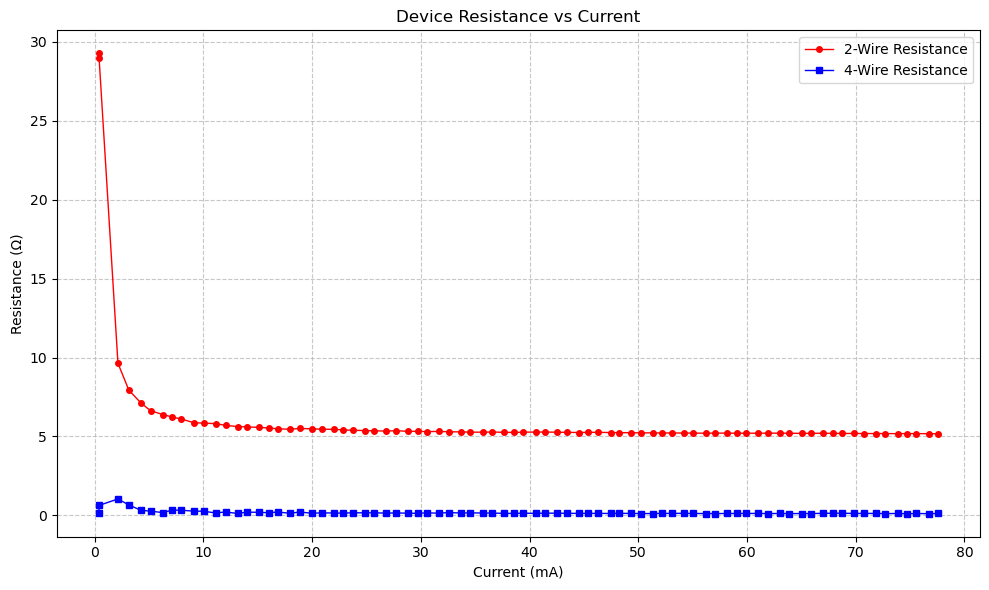

IV characterization plot saved as 'Device_IV_Characterization0.01.png'


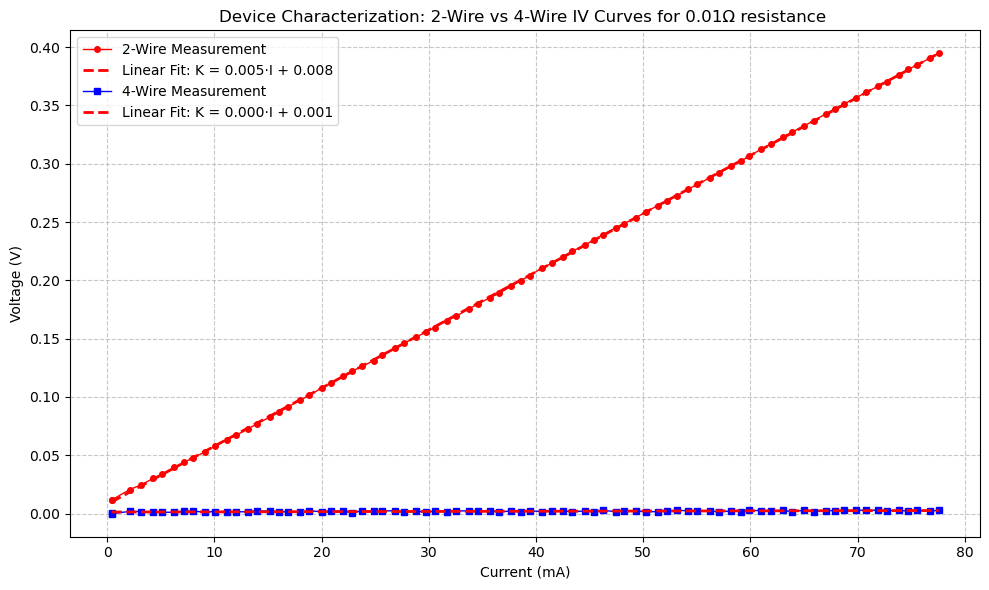

Resistance characterization plot saved as 'Device_Resistance_Characterization0.01.png'


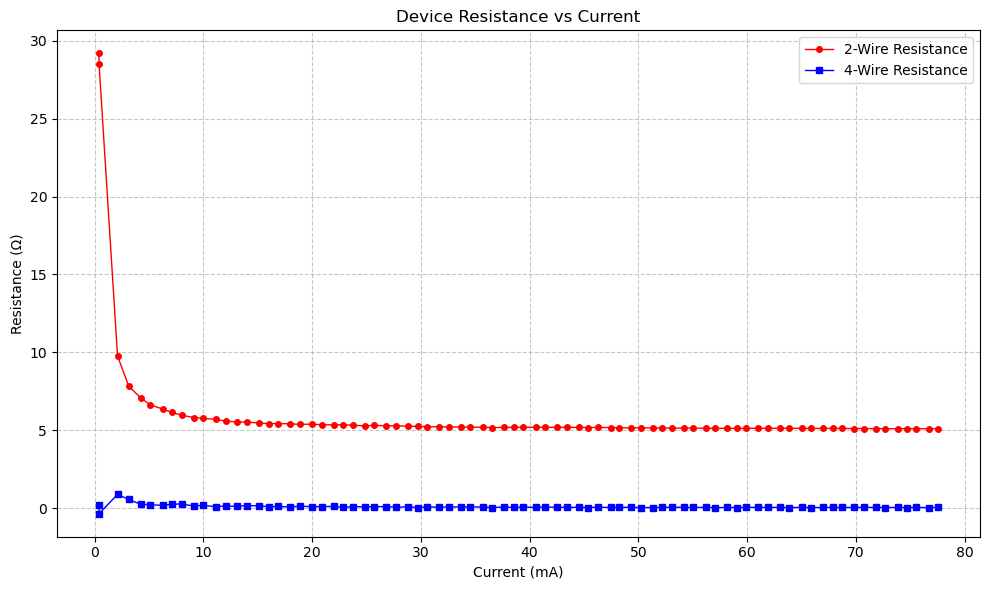

In [7]:


for R in R_values:

    df = pd.read_csv(f'Device_Characterization_Data{R}.csv')

    Fit, Off = np.polyfit(df["Current_mA"], df["V_2wire"], 1)
    Fit4, Off4 = np.polyfit(df["Current_mA"], df["V_4wire"], 1)
    df_valid = df[df["Current_mA"] > 0.1].copy()

    plt.figure(figsize=(10, 6))
    
    # Plot 2-wire IV curve
    plt.plot(df["Current_mA"], df["V_2wire"], 'ro-', label='2-Wire Measurement', markersize=4, linewidth=1)
    x_vset = np.linspace(df["Current_mA"].min(), df["Current_mA"].max(), 200)
    plt.plot(x_vset, Fit * x_vset + Off, 'r--', linewidth=2, label=f'Linear Fit: K = {Fit:.3f}·I + {Off:.3f}')
        
    # Plot 4-wire IV curve
    plt.plot(df["Current_mA"], df["V_4wire"], 'bs-', label='4-Wire Measurement', markersize=4, linewidth=1)
    x_vset4 = np.linspace(df["Current_mA"].min(), df["Current_mA"].max(), 200)
    plt.plot(x_vset, Fit4 * x_vset4 + Off4, 'r--', linewidth=2, label=f'Linear Fit: K = {Fit4:.3f}·I + {Off4:.3f}')


    plt.xlabel('Current (mA)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Device Characterization: 2-Wire vs 4-Wire IV Curves for {R}Ω resistance ')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
        
    iv_plot_filename = f'Device_IV_Characterization{R}.png'
    plt.savefig(iv_plot_filename, dpi=300)
    print(f"IV characterization plot saved as '{iv_plot_filename}'")
    plt.show()
        
    # Plot resistance comparison
    if len(df_valid) > 0:
        plt.figure(figsize=(10, 6))
        plt.plot(df_valid["Current_mA"], df_valid["R_2wire"], 'ro-', label='2-Wire Resistance', markersize=4, linewidth=1)
        plt.plot(df_valid["Current_mA"], df_valid["R_4wire"], 'bs-', label='4-Wire Resistance', markersize=4, linewidth=1)
        
            
        plt.xlabel('Current (mA)')
        plt.ylabel('Resistance (Ω)')
        plt.title('Device Resistance vs Current')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
            
        resistance_plot_filename = f"Device_Resistance_Characterization{R}.png"
        plt.savefig(resistance_plot_filename, dpi=300)
        print(f"Resistance characterization plot saved as '{resistance_plot_filename}'")
        plt.show()